Задача состоит в том, чтобы провести оценку соответствия этих параметров продукта внесенным в реестр описаниям продуктов и компаний-производителей, а также информации, размещенной на официальных сайтах компаний.
Несоответствия (при наличии) должны быть выявлены и указаны зеркально с обеих сторон связки «параметры продукта – описания», так как изменения могут требоваться и там, и там в зависимости от каждого индивидуального случая.
Для случаев, когда перечисленные характеристики продукта не внесены в реестр, необходимо предусмотреть возможность их автоопределения на базе имеющихся описаний продуктов и компаний и сайтов компаний.

Входные данные:
4 таблицы

# Этап 1
## Подготовка и обработка данных

In [3]:
import pandas as pd

company = pd.read_excel('1. Компании.xlsx')
products = pd.read_excel('2. Продукты_new.xlsx')
otrosli = pd.read_excel('3. Отрасли.xlsx')
technologi = pd.read_excel('4. Технологии.xlsx')


In [4]:
company

,global_id,Наименование поддержанной компании,Отрасль,Подотрасль,Технология (1 уровень),Технология (2 уровень),Технология (3 уровень),Сайт,Описание компании
0,784577,"ООО ""АГРОПЛАЗМА""",СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО),Растениеводство,Синтез материальных объектов,Синтез живых организмов и систем,Технологии селекции растений,http://www.agroplazma.com,ООО «Агроплазма» является оригинатором и патен...
1,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск..."
2,810785,"ООО ""РОМЕТ""",ПРОМЫШЛЕННОСТЬ,"Металлургия, металлопродукция, производство го...",Синтез материальных объектов,Новые производственные процессы,Технологии сварки и пайки,http://ro-met.com,"Компания ""ROMeT"" специализируется на производс..."
3,810786,"АО ""СМАРТФИН""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Разработка аппаратно-программных комплексов,Обработка и преобразование информации,Обработка и хранение больших данных,Интерфейсы обмена большими данными,https://www.2can.ru,Компания 2can решает проблему приема денежных ...
4,810787,"ООО ""УЧИ.РУ""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Специализированные информационные системы,Синтез информации,Синтез контента,Синтез образовательного контента,http://www.uchi.ru,"""Учи.ру"" — крупнейшая отечественная образовате..."
...,...,...,...,...,...,...,...,...,...
3712,1064098,"ООО ""ПРОКОНСАЛТ""",ИССЛЕДОВАНИЯ И ИНЖЕНЕРНО-ТЕХНИЧЕСКОЕ ПРОЕКТИРО...,"Заказные исследования и разработки, государств...",Синтез материальных объектов,Инженерные комплексы,Робототехнические решения,Не указано,"ООО ""Проконсалт"" инновационная, динамично разв..."
3713,1064163,"ООО ""ШЕРПА РОБОТИКС""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Специализированные информационные системы,Синтез информации,Искусственный интеллект,Экспертные системы на базе искусственного инте...,https://sherparpa.ru/,Компания Шерпа Роботикс - разработчик Платформ...
3714,1064380,"ООО ""ИСТИННЫЙ МЕТОД""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Специализированные информационные системы,Обработка и преобразование информации,Интеллектуальные системы управления,Системы управления жизненным циклом сложных ин...,https://projectpoint.ru/,"Частная и прибыльная Российская компания, разр..."
3715,1064405,"ООО ""ГБЦ""",ПРОМЫШЛЕННОСТЬ,Производство новых материалов,Синтез материальных объектов,Материалы с новыми свойствами,Изменение объемных свойств,http://gbc-ural.ru/ ; https://gbc-russia.ru/,Разработка и производство прокладок для двигат...


In [5]:
pr_source = products.to_numpy()
products_names = pr_source[0]
products_data = pr_source[1:]

In [6]:
products_n = pd.DataFrame(products_data, columns = products_names)
products_n['Компания'] =  products_n['Компания'].astype('int')
products_n['global_id (продукта)'] =  products_n['global_id (продукта)'].astype('int')

products_n

,global_id (продукта),Компания,Рыночное наименование продукта,Раздел (ОКПД 2),Класс (ОКПД 2),Подкласс (ОКПД 2),Группа (ОКПД 2),Подгруппа (ОКПД 2),Вид (ОКПД 2),Категория (ОКПД 2),Подкатегория (ОКПД 2),Описание продукта (с указанием конкретных характеристик)
0,812463,811059,-,Раздел B. Продукция горнодобывающих производств,09. Услуги в области добычи полезных ископаемых,09.9. Услуги в горнодобывающем производстве пр...,09.90. Услуги в горнодобывающем производстве п...,09.90.1. Услуги в горнодобывающем производстве...,09.90.19. Услуги в горнодобывающем производств...,09.90.19.100. Услуги по добыче и первичному об...,Отсутствует,Конечным продуктом проекта является роторная у...
1,812474,811423,-,"Раздел M. Услуги, связанные с научной, инженер...","72. Услуги и работы, связанные с научными иссл...","72.1. Услуги, связанные с научными исследовани...","72.19. Услуги, связанные с научными исследован...","72.19.2. Услуги, связанные с научными исследов...","72.19.21. Услуги, связанные с научными исследо...","72.19.21.000. Услуги, связанные с научными исс...",Отсутствует,Проект предполагает создание методик и фреймво...
2,812477,811310,StreamMyData,"Раздел M. Услуги, связанные с научной, инженер...",73. Услуги рекламные и услуги по исследованию ...,73.1. Услуги рекламные,"73.11. Услуги, предоставляемые рекламными аген...","73.11.1. Услуги, предоставляемые рекламными аг...",73.11.11. Набор рекламных услуг полный,73.11.11.000. Набор рекламных услуг полный,Отсутствует,"Цифровая онлайн-платформа «StreamMyData», кото..."
3,812480,811499,-,"Раздел M. Услуги, связанные с научной, инженер...","72. Услуги и работы, связанные с научными иссл...","72.1. Услуги, связанные с научными исследовани...","72.19. Услуги, связанные с научными исследован...","72.19.1. Услуги, связанные с научными исследов...","72.19.12. Услуги, связанные с научными исследо...","72.19.12.000. Услуги, связанные с научными исс...",Отсутствует,"Решение, разработанное в рамках концепции един..."
4,812481,811524,eDPROStUdy,"Раздел M. Услуги, связанные с научной, инженер...","72. Услуги и работы, связанные с научными иссл...","72.1. Услуги, связанные с научными исследовани...","72.19. Услуги, связанные с научными исследован...","72.19.1. Услуги, связанные с научными исследов...","72.19.11. Услуги, связанные с научными исследо...","72.19.11.000. Услуги, связанные с научными исс...",Отсутствует,Технология для глубокой профориентации и опред...
...,...,...,...,...,...,...,...,...,...,...,...,...
6889,1130155,1126818,"Комплекс суточного мониторивания ""Медиком-комб...",Раздел C. Продукция обрабатывающих производств,"26. Оборудование компьютерное, электронное и о...","26.6. Оборудование для облучения, электрическо...","26.60. Оборудование для облучения, электрическ...","26.60.1. Оборудование и приборы для облучения,...","26.60.12. Аппараты электродиагностические, при...",26.60.12.120. Аппараты для функциональных диаг...,26.60.12.129. Приборы и аппараты для функциона...,«Комплекс суточного мониторирования ЭКГ и АД «...
6890,1130156,1126827,Программное обеспечение для проектирования и и...,"Раздел M. Услуги, связанные с научной, инженер...","72. Услуги и работы, связанные с научными иссл...","72.1. Услуги, связанные с научными исследовани...","72.19. Услуги, связанные с научными исследован...",72.19.5. Работы оригинальные научных исследова...,72.19.50. Работы оригинальные научных исследов...,72.19.50.000. Работы оригинальные научных иссл...,Отсутствует,Программная составляющая комплекса предназначе...
6891,1130157,1126836,Комплекс средств дистанционной диагностики эле...,Раздел J. Услуги в области информации и связи,63. Услуги в области информационных технологий,"63.1. Услуги по обработке данных, размещению и...","63.11. Услуги по обработке данных, размещению ...",63.11.2. Услуги по передаче потокового видео и...,63.11.21. Услуги по передаче потокового видео,63.11.21.000. Услуги по передаче потокового видео,Отсутствует,Инновационный продукт предназначен для монитор...
6892,1130158,1126846

In [7]:
result = company.merge(products_n, left_on='global_id', right_on='Компания', how='inner')

In [8]:
result

,global_id,Наименование поддержанной компании,Отрасль,Подотрасль,Технология (1 уровень),Технология (2 уровень),Технология (3 уровень),Сайт,Описание компании,global_id (продукта),...,Рыночное наименование продукта,Раздел (ОКПД 2),Класс (ОКПД 2),Подкласс (ОКПД 2),Группа (ОКПД 2),Подгруппа (ОКПД 2),Вид (ОКПД 2),Категория (ОКПД 2),Подкатегория (ОКПД 2),Описание продукта (с указанием конкретных характеристик)
0,784577,"ООО ""АГРОПЛАЗМА""",СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО),Растениеводство,Синтез материальных объектов,Синтез живых организмов и систем,Технологии селекции растений,http://www.agroplazma.com,ООО «Агроплазма» является оригинатором и патен...,812529,...,Семена подсолнечника,"Раздел A. Продукция сельского, лесного и рыбно...",01. Продукция и услуги сельского хозяйства и о...,01.1 Культуры однолетние,"01.11. Культуры зерновые (кроме риса), зернобо...","01.11.9 Семена льна, горчицы, рапса, сурепицы,...",01.11.95. Семена подсолнечника,01.11.95.110. Семена подсолнечника для посева,Отсутствует,"Высокопродуктивные семена подсолнечника, с уко..."
1,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,-,Раздел J. Услуги в области информации и связи,63. Услуги в области информационных технологий,"63.1. Услуги по обработке данных, размещению и...","63.11. Услуги по обработке данных, размещению ...","63.11.1. Услуги по обработке данных, размещени...",63.11.19. Услуги прочие по размещению и предос...,63.11.19.000. Услуги прочие по размещению и пр...,Отсутствует,Наносемантика - технология искусственного инте...
2,810785,"ООО ""РОМЕТ""",ПРОМЫШЛЕННОСТЬ,"Металлургия, металлопродукция, производство го...",Синтез материальных объектов,Новые производственные процессы,Технологии сварки и пайки,http://ro-met.com,"Компания ""ROMeT"" специализируется на производс...",854998,...,Многослойные коррозионностойкие материалы,Раздел C. Продукция обрабатывающих производств,"25. Изделия металлические готовые, кроме машин...","25.5. Услуги по ковке, прессованию, штамповке ...",25.61. Услуги по обработке металлов и нанесени...,25.61.2. Услуги по обработке металлов прочие,25.61.22. Услуги по прочим видам обработки пов...,25.61.22.190. Услуги по прочим методам обработ...,Отсутствует,Целью развития проекта является расширение ном...
3,810786,"АО ""СМАРТФИН""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Разработка аппаратно-программных комплексов,Обработка и преобразование информации,Обработка и хранение больших данных,Интерфейсы обмена большими данными,https://www.2can.ru,Компания 2can решает проблему приема денежных ...,830299,...,2can,Раздел J. Услуги в области информации и связи,62. Продукты программные и услуги по разработк...,62.0. Продукты программные и услуги по разрабо...,62.01. Продукты программные и услуги по разраб...,"62.01.1. Услуги по проектированию, разработке ...","62.01.11. Услуги по проектированию, разработке...",62.01.11.000. Услуги по проектированию и разра...,Отсутствует,2can — платежные и кассовые решения для малого...
4,810787,"ООО ""УЧИ.РУ""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Специализированные информационные системы,Синтез информации,Синтез контента,Синтез образовательного контента,http://www.uchi.ru,"""Учи.ру"" — крупнейшая отечественная образовате...",812689,...,Учи.ру,Раздел P. Услуги в области образования,85. Услуги в области образования,85.1. Услуги в области общего образования,85.12. Услуги в области общего начального обра...,85.12.1. Услуги в области общего начального об...,85.12.11. Услуги в области дистанционного обще...,85.12.11.000. Услуги в области дистанционного ...,Отсутствует,Учи.ру — это крупнейшая отечественная образова...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6755,1064380,"ООО ""ИСТИННЫЙ МЕТОД""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Специализир

In [9]:
result= result.merge(otrosli, left_on='global_id (продукта)', right_on='Создаваемые продукты')

In [10]:
result= result.merge(technologi, left_on='global_id (продукта)', right_on='Создаваемые продукты')

In [11]:
result

,global_id_x,Наименование поддержанной компании,Отрасль_x,Подотрасль_x,Технология (1 уровень)_x,Технология (2 уровень)_x,Технология (3 уровень)_x,Сайт,Описание компании,global_id (продукта),...,Описание продукта (с указанием конкретных характеристик),global_id_y,Создаваемые продукты_x,Отрасль_y,Подотрасль_y,global_id,Создаваемые продукты_y,Технология (1 уровень)_y,Технология (2 уровень)_y,Технология (3 уровень)_y
0,784577,"ООО ""АГРОПЛАЗМА""",СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО),Растениеводство,Синтез материальных объектов,Синтез живых организмов и систем,Технологии селекции растений,http://www.agroplazma.com,ООО «Агроплазма» является оригинатором и патен...,812529,...,"Высокопродуктивные семена подсолнечника, с уко...",830963,812529,СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО),Растениеводство,834553,812529,Синтез материальных объектов,Синтез живых организмов и систем,Технологии селекции растений
1,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,831778,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"Рекомендательные системы, персональные помощни...",833597,830358,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси..."
2,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,831778,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"Рекомендательные системы, персональные помощни...",833668,830358,Синтез информации,Искусственный интеллект,Машинное обучение включая глубокое обучение и ...
3,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,831778,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"Рекомендательные системы, персональные помощни...",833738,830358,Синтез информации,Искусственный интеллект,Обработка речи (распознавание и генерирование ...
4,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,831992,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Разработка аппаратно-программных комплексов,833597,830358,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13438,1064380,"ООО ""ИСТИННЫЙ МЕТОД""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Специализированные информационные системы,Обработка и преобразование информации,Интеллектуальные системы управления,Системы управления жизненным циклом сложных ин...,https://projectpoint.ru/,"Частная и прибыльная Российская компания, разр...",1064383,...,Платформа (веб-портал и мобильное приложение) ...,1064387,1064383,СТРОИТЕЛЬСТВО,Строительство инженерных коммуникаций и сооруж...,1064391,1064383,Обработка и преобразование информации,Интеллектуальные системы управления,Системы управления жизненным циклом сложных ин...
13439,1064380,"ООО ""ИСТИННЫЙ МЕТОД""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Специализированные информационные системы,Обработка и преобразование информации,Интеллектуальные системы управления

In [12]:
incorrect = result[
    (result['Отрасль_x']!=result['Отрасль_y']) |
    (result['Подотрасль_x']!=result['Подотрасль_y'])  |
  (result['Технология (1 уровень)_x']!=result['Технология (1 уровень)_y']) |
  (result['Технология (2 уровень)_x']!=result['Технология (2 уровень)_y']) |
  (result['Технология (3 уровень)_x']!=result['Технология (3 уровень)_y'])]

In [13]:
incorrect

,global_id_x,Наименование поддержанной компании,Отрасль_x,Подотрасль_x,Технология (1 уровень)_x,Технология (2 уровень)_x,Технология (3 уровень)_x,Сайт,Описание компании,global_id (продукта),...,Описание продукта (с указанием конкретных характеристик),global_id_y,Создаваемые продукты_x,Отрасль_y,Подотрасль_y,global_id,Создаваемые продукты_y,Технология (1 уровень)_y,Технология (2 уровень)_y,Технология (3 уровень)_y
1,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,831778,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"Рекомендательные системы, персональные помощни...",833597,830358,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси..."
2,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,831778,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"Рекомендательные системы, персональные помощни...",833668,830358,Синтез информации,Искусственный интеллект,Машинное обучение включая глубокое обучение и ...
3,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,831778,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"Рекомендательные системы, персональные помощни...",833738,830358,Синтез информации,Искусственный интеллект,Обработка речи (распознавание и генерирование ...
4,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,831992,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Разработка аппаратно-программных комплексов,833597,830358,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси..."
5,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,831992,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Разработка аппаратно-программных комплексов,833668,830358,Синтез информации,Искусственный интеллект,Машинное обучение включая глубокое обучение и ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13437,1064380,"ООО ""ИСТИННЫЙ МЕТОД""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Специализированные информационные системы,Обработка и преобразование информации,Интеллектуальные системы управления,Системы управления жизненным циклом сложных ин...,https://projectpoint.ru/,"Частная и прибыльная Российская компания, разр...",1064383,...,Платформа (веб-портал и мобильное приложение) ...,1064386,1064383,СТРОИТЕЛЬСТВО,Строительство автомобильных и железных дорог,1064391,1064383,Обработка и преобразование информации,Интеллектуальные системы управления,Системы управления жизненным циклом сложных ин...
13438,1064380,"ООО ""ИСТИННЫЙ МЕТОД""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Специализированные информационные системы,Обработка и преобразо

In [257]:
correct = result[
    (result['Отрасль_x']==result['Отрасль_y']) &
    (result['Подотрасль_x']==result['Подотрасль_y'])  &
  (result['Технология (1 уровень)_x']==result['Технология (1 уровень)_y']) &
  (result['Технология (2 уровень)_x']==result['Технология (2 уровень)_y']) &
  (result['Технология (3 уровень)_x']==result['Технология (3 уровень)_y'])]

In [258]:
correct

,global_id_x,Наименование поддержанной компании,Отрасль_x,Подотрасль_x,Технология (1 уровень)_x,Технология (2 уровень)_x,Технология (3 уровень)_x,Сайт,Описание компании,global_id (продукта),...,Описание продукта (с указанием конкретных характеристик),global_id_y,Создаваемые продукты_x,Отрасль_y,Подотрасль_y,global_id,Создаваемые продукты_y,Технология (1 уровень)_y,Технология (2 уровень)_y,Технология (3 уровень)_y
0,784577,"ООО ""АГРОПЛАЗМА""",СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО),Растениеводство,Синтез материальных объектов,Синтез живых организмов и систем,Технологии селекции растений,http://www.agroplazma.com,ООО «Агроплазма» является оригинатором и патен...,812529,...,"Высокопродуктивные семена подсолнечника, с уко...",830963,812529,СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО),Растениеводство,834553,812529,Синтез материальных объектов,Синтез живых организмов и систем,Технологии селекции растений
7,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,832343,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,833597,830358,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси..."
41,810789,"ООО ""УВП""",БЕЗОПАСНОСТЬ И КОНТРОЛЬНО-НАДЗОРНАЯ ДЕЯТЕЛЬНОСТЬ,Системы охраны и обеспечения безопасности,Синтез материальных объектов,Инженерные комплексы,Системы промышленной безопасности,http://www.ufdcom.ru,Компания ООО «УВП» создана в 2006 году для кон...,854994,...,Волоконно-оптические технологии мониторинга ин...,855911,854994,БЕЗОПАСНОСТЬ И КОНТРОЛЬНО-НАДЗОРНАЯ ДЕЯТЕЛЬНОСТЬ,Системы охраны и обеспечения безопасности,855641,854994,Синтез материальных объектов,Инженерные комплексы,Системы промышленной безопасности
52,810791,"ООО ""ИК ""ТЕПЛОФОН""",ИССЛЕДОВАНИЯ И ИНЖЕНЕРНО-ТЕХНИЧЕСКОЕ ПРОЕКТИРО...,Инженерно-техническое проектирование,Синтез материальных объектов,Новые производственные процессы,Технологии сварки и пайки,https://www.teplofon.ru,Производственная компания Теплофон с 1997 года...,812559,...,ИК Теплофон занимается разработкой и производс...,832404,812559,ИССЛЕДОВАНИЯ И ИНЖЕНЕРНО-ТЕХНИЧЕСКОЕ ПРОЕКТИРО...,Инженерно-техническое проектирование,834480,812559,Синтез материальных объектов,Новые производственные процессы,Технологии сварки и пайки
55,810792,"ООО ""СОНОГРАМ""",ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,Добыча нефти и природного газа,Сбор информации об объекте,Физико-химические методы,Регистрация и преобразование акустических сигн...,https://tgtdiagnostics.com/,Международная компания «TgT Oilfield ServiceS»...,854985,...,Технология скважинной спектральной шумометрии ...,856062,854985,ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ,Добыча нефти и природного газа,855613,854985,Сбор информации об объекте,Физико-химические методы,Регистрация и преобразование акустических сигн...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13243,1063963,"ООО ""АКВИЛ""",ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ,Прочие услуги,Синтез информации,Синтез контента,Синтез образовательного контента,www.akvil-samara.ru,ЦМИТ «АКВИЛ» создает и поддерживает условия дл...,1063995,...,"Грант на реализацию мероприятия, обеспечивающе...",1064009,1063995,ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ,Прочие услуги,1064012,1063995,Синтез информации,Синтез контента,Синтез образовательного контента
13244,1063963,"ООО ""АКВИЛ""",ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ,Прочие услуги,Синтез информации,Синтез контента,Синтез образовательного контента,www.akvil-samara.ru,ЦМИТ «АКВИЛ» создает и поддерживает условия дл...,1063995,...,"Грант на реализацию мероприятия, обеспечивающе...",1064010,1063995,ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ,Прочие услуги,1064012,1063995,Синтез информации,Синтез контента,Синтез образовательного контента
13245,1063963,"ООО ""АКВИЛ""",ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ,Про

# Сверка со справочником

In [259]:
help_otrasl = pd.read_excel('Справочник. Отрасли и подотрасли.xlsx')
help_otrasl

,Допустимые значения поля:,Unnamed: 1
0,Отрасль,Наименование подотрасли
1,СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО),Животноводство
2,СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО),Растениеводство
3,СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО),Рыболовство и рыбоводство
4,СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО),Лесоводство и лесозаготовка
...,...,...
145,ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ,Деятельность домашних хозяйств с наемными рабо...
146,ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ,"Предоставление прочих персональных услуг, не в..."
147,ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ,Деятельность недифференцированная частных дома...
148,ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ,Прочие услуги


# Тестируем данные

In [14]:
correct_otrasl = result[ (result['Отрасль_x'] == result['Отрасль_y'])]
correct_podotrasl = result[ (result['Подотрасль_x'] == result['Подотрасль_y'])]

Подборка лучшего классифиактора на примере отрасли

In [15]:
correct_otrasl

,global_id_x,Наименование поддержанной компании,Отрасль_x,Подотрасль_x,Технология (1 уровень)_x,Технология (2 уровень)_x,Технология (3 уровень)_x,Сайт,Описание компании,global_id (продукта),...,Описание продукта (с указанием конкретных характеристик),global_id_y,Создаваемые продукты_x,Отрасль_y,Подотрасль_y,global_id,Создаваемые продукты_y,Технология (1 уровень)_y,Технология (2 уровень)_y,Технология (3 уровень)_y
0,784577,"ООО ""АГРОПЛАЗМА""",СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО),Растениеводство,Синтез материальных объектов,Синтез живых организмов и систем,Технологии селекции растений,http://www.agroplazma.com,ООО «Агроплазма» является оригинатором и патен...,812529,...,"Высокопродуктивные семена подсолнечника, с уко...",830963,812529,СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО),Растениеводство,834553,812529,Синтез материальных объектов,Синтез живых организмов и систем,Технологии селекции растений
1,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,831778,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"Рекомендательные системы, персональные помощни...",833597,830358,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси..."
2,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,831778,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"Рекомендательные системы, персональные помощни...",833668,830358,Синтез информации,Искусственный интеллект,Машинное обучение включая глубокое обучение и ...
3,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,831778,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"Рекомендательные системы, персональные помощни...",833738,830358,Синтез информации,Искусственный интеллект,Обработка речи (распознавание и генерирование ...
4,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,831992,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Разработка аппаратно-программных комплексов,833597,830358,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13394,1064163,"ООО ""ШЕРПА РОБОТИКС""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Специализированные информационные системы,Синтез информации,Искусственный интеллект,Экспертные системы на базе искусственного инте...,https://sherparpa.ru/,Компания Шерпа Роботикс - разработчик Платформ...,1064273,...,Платформа Sherpa RPA для полного цикла роботиз...,1064327,1064273,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Прочая связь и телеметрия,1064368,1064273,Синтез информации,Искусственный интеллект,Экспертные системы на базе искусственного инте...
13425,1064163,"ООО ""ШЕРПА РОБОТИКС""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Специализированные информационные системы,Синтез информации,Искусственный интеллект,Экспертные системы на базе искусственного инте...,https://sherparpa.ru/,Компания Шерпа Роботикс - разработчик 

In [16]:
data = pd.DataFrame({'Отрасль': correct_otrasl['Отрасль_x'], 'Описание': correct_otrasl['Описание компании']})
data

,Отрасль,Описание
0,СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО),ООО «Агроплазма» является оригинатором и патен...
1,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"""Лаборатория Наносемантика"" — ведущий российск..."
2,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"""Лаборатория Наносемантика"" — ведущий российск..."
3,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"""Лаборатория Наносемантика"" — ведущий российск..."
4,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"""Лаборатория Наносемантика"" — ведущий российск..."
...,...,...
13394,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Компания Шерпа Роботикс - разработчик Платформ...
13425,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Компания Шерпа Роботикс - разработчик Платформ...
13426,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Компания Шерпа Роботикс - разработчик Платформ...
13440,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"Частная и прибыльная Российская компания, разр..."


In [17]:
data.drop_duplicates(subset=['Описание'], inplace=True)

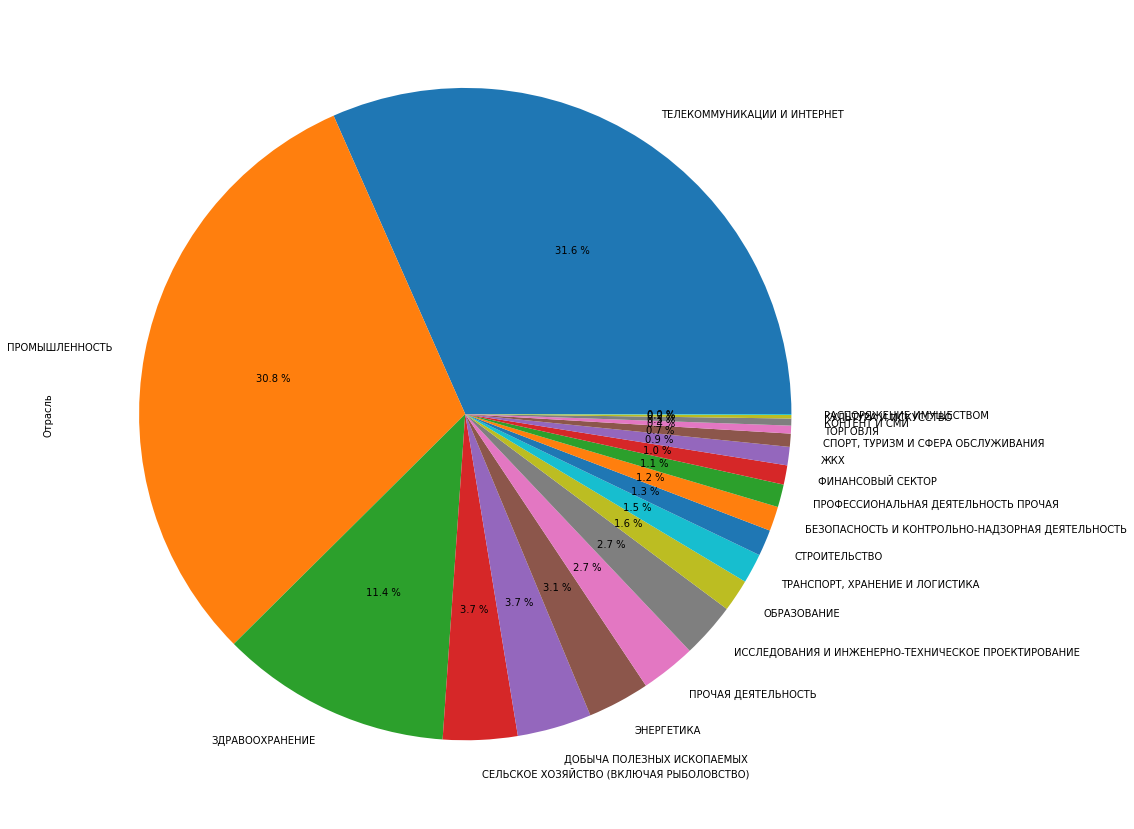

In [31]:
data['Отрасль'].value_counts().plot(kind='pie', y='Описание', autopct='%.1f %%', figsize = (15,15))

Проверка баланса классов

In [264]:
len(data['Отрасль'].value_counts())
num_classes = 20

Подготовка текста к преобразованиям

In [265]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
russian_stopwords = stopwords.words("russian")

# Удаление знаков пунктуации из текста
def remove_punct(text):
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)

data['Описание_clean'] = data['Описание'].map(lambda x: x.lower())
data['Описание_clean'] = data['Описание_clean'].map(lambda x: remove_punct(x))
data['Описание_clean'] = data['Описание_clean'].map(lambda x: x.split(' '))
data['Описание_clean'] = data['Описание_clean'].map(lambda x: [token for token in x if token not in russian_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
data['Описание_clean'] = data['Описание_clean'].map(lambda x: ' '.join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [266]:
data

,Отрасль,Описание,Описание_clean
0,СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО),ООО «Агроплазма» является оригинатором и патен...,ооо «агроплазма» является оригинатором патенто...
1,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"""Лаборатория Наносемантика"" — ведущий российск...",лаборатория наносемантика — ведущий российский...
10,ПРОМЫШЛЕННОСТЬ,"Компания ""ROMeT"" специализируется на производс...",компания romet специализируется производстве м...
41,БЕЗОПАСНОСТЬ И КОНТРОЛЬНО-НАДЗОРНАЯ ДЕЯТЕЛЬНОСТЬ,Компания ООО «УВП» создана в 2006 году для кон...,компания ооо «увп» создана 2006 году консолида...
45,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"YoUScan – это международная компания, разрабат...",youscan – это международная компания разрабаты...
...,...,...,...
13174,ЗДРАВООХРАНЕНИЕ,"ООО Хелз Рековери - инновационная компания, со...",ооо хелз рековери инновационная компания созда...
13247,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"ООО ""Некоробка"" - первый шаг в творчество\nПом...",ооо некоробка первый шаг творчество\nпомогаем ...
13271,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Компания Шерпа Роботикс - разработчик Платформ...,компания шерпа роботикс разработчик платформы ...
13440,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,"Частная и прибыльная Российская компания, разр...",частная прибыльная российская компания разрабо...


In [267]:
descriptions = data['Описание_clean']
categories = data['Отрасль']

In [268]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(descriptions).toarray()

In [269]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()


In [270]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, categories, test_size=0.2, random_state=0)

In [271]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [272]:
from sklearn.linear_model import LogisticRegression

scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
model=scikit_log_reg.fit(X_train,y_train)

[LibLinear]

In [273]:
y_pred = classifier.predict(X_test)
y_pred_lr = model.predict(X_test)

In [274]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_pred_lr))
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred_lr))

                                                     precision    recall  f1-score   support

   БЕЗОПАСНОСТЬ И КОНТРОЛЬНО-НАДЗОРНАЯ ДЕЯТЕЛЬНОСТЬ       1.00      0.20      0.33         5
                         ДОБЫЧА ПОЛЕЗНЫХ ИСКОПАЕМЫХ       1.00      0.47      0.64        19
                                                ЖКХ       0.00      0.00      0.00         3
                                    ЗДРАВООХРАНЕНИЕ       0.56      0.44      0.49        52
ИССЛЕДОВАНИЯ И ИНЖЕНЕРНО-ТЕХНИЧЕСКОЕ ПРОЕКТИРОВАНИЕ       0.00      0.00      0.00        20
                                      КОНТЕНТ И СМИ       0.00      0.00      0.00         1
                               КУЛЬТУРА И ИСКУССТВО       0.00      0.00      0.00         1
                                        ОБРАЗОВАНИЕ       0.00      0.00      0.00         7
                                     ПРОМЫШЛЕННОСТЬ       0.57      0.82      0.67       135
               ПРОФЕССИОНАЛЬНАЯ ДЕЯТЕЛЬНОСТЬ ПРОЧАЯ       0.00      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Тестирование выбранной модели на остальных параметрах

In [275]:
correct_podotrasl

,global_id_x,Наименование поддержанной компании,Отрасль_x,Подотрасль_x,Технология (1 уровень)_x,Технология (2 уровень)_x,Технология (3 уровень)_x,Сайт,Описание компании,global_id (продукта),...,Описание продукта (с указанием конкретных характеристик),global_id_y,Создаваемые продукты_x,Отрасль_y,Подотрасль_y,global_id,Создаваемые продукты_y,Технология (1 уровень)_y,Технология (2 уровень)_y,Технология (3 уровень)_y
0,784577,"ООО ""АГРОПЛАЗМА""",СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО),Растениеводство,Синтез материальных объектов,Синтез живых организмов и систем,Технологии селекции растений,http://www.agroplazma.com,ООО «Агроплазма» является оригинатором и патен...,812529,...,"Высокопродуктивные семена подсолнечника, с уко...",830963,812529,СЕЛЬСКОЕ ХОЗЯЙСТВО (ВКЛЮЧАЯ РЫБОЛОВСТВО),Растениеводство,834553,812529,Синтез материальных объектов,Синтез живых организмов и систем,Технологии селекции растений
7,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,832343,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,833597,830358,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси..."
8,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,832343,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,833668,830358,Синтез информации,Искусственный интеллект,Машинное обучение включая глубокое обучение и ...
9,810784,"ООО ""ЛАБОРАТОРИЯ НАНОСЕМАНТИКА""",ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,Синтез информации,Искусственный интеллект,"Обработка естественных языков (перевод, класси...",https://nanosemantics.ai/,"""Лаборатория Наносемантика"" — ведущий российск...",830358,...,Наносемантика - технология искусственного инте...,832343,830358,ТЕЛЕКОММУНИКАЦИИ И ИНТЕРНЕТ,Деятельность по созданию новых информационных ...,833738,830358,Синтез информации,Искусственный интеллект,Обработка речи (распознавание и генерирование ...
41,810789,"ООО ""УВП""",БЕЗОПАСНОСТЬ И КОНТРОЛЬНО-НАДЗОРНАЯ ДЕЯТЕЛЬНОСТЬ,Системы охраны и обеспечения безопасности,Синтез материальных объектов,Инженерные комплексы,Системы промышленной безопасности,http://www.ufdcom.ru,Компания ООО «УВП» создана в 2006 году для кон...,854994,...,Волоконно-оптические технологии мониторинга ин...,855911,854994,БЕЗОПАСНОСТЬ И КОНТРОЛЬНО-НАДЗОРНАЯ ДЕЯТЕЛЬНОСТЬ,Системы охраны и обеспечения безопасности,855641,854994,Синтез материальных объектов,Инженерные комплексы,Системы промышленной безопасности
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13243,1063963,"ООО ""АКВИЛ""",ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ,Прочие услуги,Синтез информации,Синтез контента,Синтез образовательного контента,www.akvil-samara.ru,ЦМИТ «АКВИЛ» создает и поддерживает условия дл...,1063995,...,"Грант на реализацию мероприятия, обеспечивающе...",1064009,1063995,ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ,Прочие услуги,1064012,1063995,Синтез информации,Синтез контента,Синтез образовательного контента
13244,1063963,"ООО ""АКВИЛ""",ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ,Прочие услуги,Синтез информации,Синтез контента,Синтез образовательного контента,www.akvil-samara.ru,ЦМИТ «АКВИЛ» создает и поддерживает условия дл...,1063995,...,"Грант на реализацию мероприятия, обеспечивающе...",1064010,1063995,ПРОЧАЯ ДЕЯТЕЛЬНОСТЬ,Прочие услуги,1064012,1063995,Синтез информации,Синтез контента,Синтез образовательного контента
13

In [276]:
data = pd.DataFrame({'Подотрасль': correct_podotrasl['Подотрасль_x'], 'Описание': correct_podotrasl['Описание компании']})
data.drop_duplicates(subset=['Описание'], inplace=True)
data

,Подотрасль,Описание
0,Растениеводство,ООО «Агроплазма» является оригинатором и патен...
7,Деятельность по созданию новых информационных ...,"""Лаборатория Наносемантика"" — ведущий российск..."
41,Системы охраны и обеспечения безопасности,Компания ООО «УВП» создана в 2006 году для кон...
51,Инженерно-техническое проектирование,Производственная компания Теплофон с 1997 года...
54,Добыча нефти и природного газа,Международная компания «TgT Oilfield ServiceS»...
...,...,...
13110,Производство новых материалов,Компания специализируется на разработке роботи...
13119,Автомобильная промышленность,"Основным направлением деятельности фирмы ""Софт..."
13131,Специализированные информационные системы,Компания ООО «ИНТЕЛЛЕКТА» специализируется в р...
13174,Разработка ПО для использования в медицине,"ООО Хелз Рековери - инновационная компания, со..."


In [277]:
data['Подотрасль'].value_counts().head(60)

Специализированные информационные системы                                          209
Разработка аппаратно-программных комплексов                                        142
Машиностроение                                                                     110
Производство электронного и электрического оборудования                             92
Производство медицинских инструментов и оборудования для терапии и реабилитации     85
Деятельность по созданию новых информационных технологий                            83
Рекомендательные системы, персональные помощники и агрегаторы                       74
Разработка ПО для использования в медицине                                          66
Прочие услуги                                                                       61
Химическая промышленность                                                           57
Добыча нефти и природного газа                                                      55
Растениеводство                            

In [278]:
len(data['Подотрасль'].value_counts())
#Удаление знаков пунктуации из текста

def remove_punct(text):
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)

data['Описание_clean'] = data['Описание'].map(lambda x: x.lower())
data['Описание_clean'] = data['Описание_clean'].map(lambda x: remove_punct(x))
data['Описание_clean'] = data['Описание_clean'].map(lambda x: x.split(' '))
data['Описание_clean'] = data['Описание_clean'].map(lambda x: [token for token in x if token not in russian_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
data['Описание_clean'] = data['Описание_clean'].map(lambda x: ' '.join(x))

descriptions = data['Описание_clean']
categories = data['Подотрасль']

In [279]:
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(descriptions).toarray()

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, categories, test_size=0.2, random_state=0)

In [280]:
scikit_log_reg = LogisticRegression(verbose=1, solver='newton-cg',random_state=0, C=5, penalty='l2',max_iter=1000)
model=scikit_log_reg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.1s finished


In [281]:
y_pred_lr = model.predict(X_test)
print(classification_report(y_test,y_pred_lr))

                                                                                          precision    recall  f1-score   support

                                                          Авиакосмическая промышленность       1.00      0.14      0.25         7
                                                                           Авиаперевозки       0.00      0.00      0.00         1
                                                            Автомобильная промышленность       0.00      0.00      0.00         5
                                                               Альтернативная энергетика       0.00      0.00      0.00         5
                                                                      Атомная энергетика       0.00      0.00      0.00         2
                                                                 Банковская деятельность       0.00      0.00      0.00         2
                                                         Безопасность дорожного движения 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [282]:
OKPD = []
OKPD_codes = []

OKPD.append(result['Раздел (ОКПД 2)'].apply(lambda x: x[7]))
# OKPD.append(result['Класс (ОКПД 2)'].values)
# OKPD.append(result['Подкласс (ОКПД 2)'].values)
# OKPD.append(result['Группа (ОКПД 2)'].values)
# OKPD.append(result['Подгруппа (ОКПД 2)'].values)
# OKPD.append(result['Вид (ОКПД 2)'].values)
OKPD.append(result['Категория (ОКПД 2)'].astype('str').apply(lambda x: x[:5]))
# OKPD.append(result['Подкатегория (ОКПД 2)'].values)  

In [283]:
OKPD


[0        A
 1        J
 2        J
 3        J
 4        J
         ..
 13438    J
 13439    J
 13440    J
 13441    J
 13442    C
 Name: Раздел (ОКПД 2), Length: 13443, dtype: object, 0        01.11
 1        63.11
 2        63.11
 3        63.11
 4        63.11
          ...  
 13438    62.01
 13439    62.01
 13440    62.01
 13441    62.01
 13442      nan
 Name: Категория (ОКПД 2), Length: 13443, dtype: object]

In [284]:
for i in range(len(OKPD[0])):
  OKPD_codes.append(OKPD[0][i] + OKPD[1][i])

In [285]:
OKPD_codes

['A01.11',
 'J63.11',
 'J63.11',
 'J63.11',
 'J63.11',
 'J63.11',
 'J63.11',
 'J63.11',
 'J63.11',
 'J63.11',
 'C25.61',
 'C25.61',
 'C25.61',
 'C25.61',
 'J62.01',
 'J62.01',
 'J62.01',
 'J62.01',
 'J62.01',
 'J62.01',
 'J62.01',
 'J62.01',
 'J62.01',
 'P85.12',
 'P85.12',
 'P85.12',
 'P85.12',
 'P85.12',
 'P85.12',
 'P85.12',
 'P85.12',
 'P85.12',
 'J62.03',
 'J62.03',
 'J62.03',
 'J62.03',
 'J62.03',
 'J62.03',
 'J62.03',
 'J62.03',
 'J62.03',
 'C26.30',
 'M72.20',
 'M72.20',
 'M72.20',
 'M72.20',
 'M72.20',
 'M72.20',
 'C27.51',
 'C27.51',
 'C27.51',
 'C27.51',
 'C27.51',
 'C27.51',
 'B09.10',
 'B09.10',
 'B09.10',
 'B09.10',
 'M72.19',
 'M72.19',
 'M72.19',
 'M72.19',
 'M72.19',
 'M72.19',
 'J59.12',
 'J59.12',
 'J59.12',
 'J59.12',
 'J59.12',
 'J59.12',
 'J59.12',
 'J59.12',
 'J59.12',
 'C19.20',
 'C20.59',
 'E38.22',
 'E38.22',
 'E38.22',
 'E38.22',
 'E38.22',
 'E38.22',
 'E38.22',
 'E38.22',
 'E38.22',
 'M72.19',
 'M72.19',
 'M72.19',
 'B09.10',
 'B09.10',
 'B09.10',
 'C26.11',

Тестирование на продуктах

In [286]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13443 entries, 0 to 13442
Data columns (total 30 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   global_id_x                                               13443 non-null  int64 
 1   Наименование поддержанной компании                        13443 non-null  object
 2   Отрасль_x                                                 13443 non-null  object
 3   Подотрасль_x                                              13443 non-null  object
 4   Технология (1 уровень)_x                                  13443 non-null  object
 5   Технология (2 уровень)_x                                  13443 non-null  object
 6   Технология (3 уровень)_x                                  13443 non-null  object
 7   Сайт                                                      13443 non-null  object
 8   Описание компании         

In [287]:
data = pd.DataFrame({'ОКПД': OKPD_codes, 'Описание': result['Описание продукта (с указанием конкретных характеристик)']})
data.drop_duplicates(subset=['Описание'], inplace=True)
data

,ОКПД,Описание
0,A01.11,"Высокопродуктивные семена подсолнечника, с уко..."
1,J63.11,Наносемантика - технология искусственного инте...
10,C25.61,Целью развития проекта является расширение ном...
14,J62.01,2can — платежные и кассовые решения для малого...
23,P85.12,Учи.ру — это крупнейшая отечественная образова...
...,...,...
13247,P85.41,Программное обеспечение для развития творческо...
13255,M72.19,В ходе выполнения проекта будут выполнены след...
13271,J62.01,Платформа Sherpa RPA для полного цикла роботиз...
13435,J62.01,Платформа (веб-портал и мобильное приложение) ...


In [288]:
data['ОКПД'].value_counts().head(60)

J62.01    556
J63.11    315
M72.19    308
C26.51    127
Q86.90     75
C32.50     62
C20.59     61
C27.90     54
B09.10     54
C28.99     51
J63.99     49
C26.30     49
C26.20     44
C26.60     41
J58.29     41
J62.09     34
M72.11     33
J62.02     30
P85.41     29
C21.20     26
C26.11     26
C28.29     26
M70.22     25
P85.42     24
C30.30     22
C28.92     22
C28.14     21
M71.12     21
C27.12     20
C27.11     20
D35.11     18
C28.13     18
C25.99     18
C28.41     18
C27.40     17
C32.99     17
A01.61     17
C26.70     16
M71.20     16
C28.96     16
M73.11     15
Q86.10     15
C22.29     15
J61.20     14
C28.30     14
C29.32     13
J62.03     13
C10.89     13
M74.90     13
C20.20     12
C29.10     12
C28.22     12
C23.99     12
C28.25     11
C28.93     11
C22.19     10
C25.11     10
C20.16     10
C26.12     10
J63.12     10
Name: ОКПД, dtype: int64

In [289]:
def remove_punct(text):
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)

data['Описание_clean'] = data['Описание'].map(lambda x: x.lower())
data['Описание_clean'] = data['Описание_clean'].map(lambda x: remove_punct(x))
data['Описание_clean'] = data['Описание_clean'].map(lambda x: x.split(' '))
data['Описание_clean'] = data['Описание_clean'].map(lambda x: [token for token in x if token not in russian_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
data['Описание_clean'] = data['Описание_clean'].map(lambda x: ' '.join(x))

descriptions = data['Описание_clean']
categories = data['ОКПД']

In [290]:
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(descriptions).toarray()

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, categories, test_size=0.2, random_state=0)

In [291]:
scikit_log_reg = LogisticRegression(verbose=1, solver='newton-cg',random_state=0, C=5, penalty='l2',max_iter=1000)
model=scikit_log_reg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   46.4s finished


In [292]:
y_pred_lr = model.predict(X_test)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

      A01.13       0.00      0.00      0.00         2
      A01.27       0.00      0.00      0.00         1
      A01.30       0.00      0.00      0.00         1
      A01.41       0.00      0.00      0.00         1
      A01.49       0.00      0.00      0.00         1
      A01.61       0.00      0.00      0.00         3
      A01.62       0.00      0.00      0.00         1
      A01.64       0.00      0.00      0.00         1
      A02.10       0.00      0.00      0.00         2
      A02.30       0.00      0.00      0.00         1
      A03.21       0.00      0.00      0.00         1
      A03.22       0.00      0.00      0.00         2
      B06.10       0.00      0.00      0.00         2
      B06.20       0.00      0.00      0.00         1
      B08.11       0.00      0.00      0.00         1
      B08.12       0.00      0.00      0.00         1
      B09.10       0.56      0.56      0.56         9
      B09.90       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
